## 1-Méthode get_successor()

In [94]:
class Noeud:
    def __init__(self):
        """ Initialisation du jeu avec placement alterné des pièces. """
        self.bitboard_X = 0  # Bitboard pour le joueur
        self.bitboard_O = 0  # Bitboard pour l'IA
        self.initialiser_plateau()

    def afficher_plateau(self):
        """ Affiche le plateau sous forme lisible """
        print("\nPlateau actuel :")
        for i in range(9):
            if self.bitboard_X & (1 << i):
                print("X", end=" ")
            elif self.bitboard_O & (1 << i):
                print("O", end=" ")
            else:
                print(".", end=" ")  # Case vide

            if i % 3 == 2:  # Retour à la ligne tous les 3 éléments
                print()

    def initialiser_plateau(self):
        """ Placement alterné des pièces par le joueur et l'IA. """
        print("=== Initialisation du plateau ===")
        self.afficher_plateau()
        
        positions_choisies = set()
        
        for _ in range(3):  # Chacun place 3 pièces
            
            # Tour du joueur
            while True:
                try:
                    pos = int(input("Entrez la position (0-8) pour placer un 'X' : "))
                    if pos < 0 or pos > 8 or pos in positions_choisies:
                        print("❌ Position invalide ou déjà occupée. Réessayez.")
                    else:
                        positions_choisies.add(pos)
                        self.bitboard_X |= (1 << pos)
                        self.afficher_plateau()
                        break
                except ValueError:
                    print("❌ Entrée invalide. Entrez un chiffre entre 0 et 8.")

            # Tour de l'IA
            print("\n🤖 L'IA place son pion...")
            for i in range(9):
                if i not in positions_choisies:
                    self.bitboard_O |= (1 << i)
                    positions_choisies.add(i)
                    break
            self.afficher_plateau()
        
        print("\n✅ Plateau initialisé avec succès !")

    def get_successor(self):
        """ Génère tous les successeurs possibles du plateau actuel """
        successors = []

        # Directions possibles pour un déplacement (Haut, Bas, Gauche, Droite)
        directions = [-3, +3, -1, +1]

        for i in range(9):  # Parcours des cases
            if self.bitboard_X & (1 << i):  # Si un pion X est présent sur cette case
                for d in directions:
                    new_pos = i + d
                    if 0 <= new_pos < 9 and not (self.bitboard_X & (1 << new_pos)) and not (self.bitboard_O & (1 << new_pos)):
                        # Création d'un nouvel état
                        new_bitboard_X = self.bitboard_X & ~(1 << i)  # Retirer X de l'ancienne position
                        new_bitboard_X |= (1 << new_pos)  # Mettre X à la nouvelle position
                        successors.append(EtatNoeud(new_bitboard_X, self.bitboard_O))  # Ajouter à la liste

        return successors

    def afficher_successeurs(self):
        """ Affiche tous les successeurs possibles """
        print("\n🔄 Successeurs possibles après un coup :")
        for successeur in self.get_successor():
            successeur.afficher_plateau()

class EtatNoeud:
    """ Représente un état du jeu après un coup """
    def __init__(self, bitboard_X, bitboard_O):
        self.bitboard_X = bitboard_X
        self.bitboard_O = bitboard_O

    def afficher_plateau(self):
        """ Affiche le plateau sous forme lisible """
        print("\nSuccesseur :")
        for i in range(9):
            if self.bitboard_X & (1 << i):
                print("X", end=" ")
            elif self.bitboard_O & (1 << i):
                print("O", end=" ")
            else:
                print(".", end=" ")

            if i % 3 == 2:
                print()

# Lancement du jeu
jeu = Noeud()
jeu.afficher_successeurs()


=== Initialisation du plateau ===

Plateau actuel :
. . . 
. . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  


❌ Entrée invalide. Entrez un chiffre entre 0 et 8.


Entrez la position (0-8) pour placer un 'X' :  2



Plateau actuel :
. . X 
. . . 
. . . 

🤖 L'IA place son pion...

Plateau actuel :
O . X 
. . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  3



Plateau actuel :
O . X 
X . . 
. . . 

🤖 L'IA place son pion...

Plateau actuel :
O O X 
X . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  8



Plateau actuel :
O O X 
X . . 
. . X 

🤖 L'IA place son pion...

Plateau actuel :
O O X 
X O . 
. . X 

✅ Plateau initialisé avec succès !

🔄 Successeurs possibles après un coup :

Successeur :
O O . 
X O X 
. . X 

Successeur :
O O X 
. O . 
X . X 

Successeur :
O O X 
X O X 
. . . 

Successeur :
O O X 
X O . 
. X . 


## 2-Une méthode qui teste si un joueur a gagné dans l'etat en cours

In [91]:
class Noeud:
    def __init__(self):
        """ Initialisation du jeu avec placement alterné des pièces. """
        self.bitboard_X = 0  # Bitboard pour le joueur
        self.bitboard_O = 0  # Bitboard pour l'IA
        self.initialiser_plateau()

    def afficher_plateau(self):
        """ Affiche le plateau sous forme lisible """
        print("\nPlateau actuel :")
        for i in range(9):
            if self.bitboard_X & (1 << i):
                print("X", end=" ")
            elif self.bitboard_O & (1 << i):
                print("O", end=" ")
            else:
                print(".", end=" ")  # Case vide

            if i % 3 == 2:  # Retour à la ligne tous les 3 éléments
                print()

    def initialiser_plateau(self):
        """ Placement alterné des pièces par le joueur et l'IA. """
        print("=== Initialisation du plateau ===")
        self.afficher_plateau()
        
        positions_choisies = set()
        
        for _ in range(3):  # Chacun place 3 pièces
            
            # Tour du joueur
            while True:
                try:
                    pos = int(input("Entrez la position (0-8) pour placer un 'X' : "))
                    if pos < 0 or pos > 8 or pos in positions_choisies:
                        print("❌ Position invalide ou déjà occupée. Réessayez.")
                    else:
                        positions_choisies.add(pos)
                        self.bitboard_X |= (1 << pos)
                        self.afficher_plateau()
                        break
                except ValueError:
                    print("❌ Entrée invalide. Entrez un chiffre entre 0 et 8.")

            # Tour de l'IA
            print("\n🤖 L'IA place son pion...")
            for i in range(9):
                if i not in positions_choisies:
                    self.bitboard_O |= (1 << i)
                    positions_choisies.add(i)
                    break
            self.afficher_plateau()
        
        print("\n✅ Plateau initialisé avec succès !")

    def get_successor(self):
        """ Génère tous les successeurs possibles du plateau actuel """
        successors = []

        # Directions possibles pour un déplacement (Haut, Bas, Gauche, Droite)
        directions = [-3, +3, -1, +1]

        for i in range(9):  # Parcours des cases
            if self.bitboard_X & (1 << i):  # Si un pion X est présent sur cette case
                for d in directions:
                    new_pos = i + d
                    if 0 <= new_pos < 9 and not (self.bitboard_X & (1 << new_pos)) and not (self.bitboard_O & (1 << new_pos)):
                        # Création d'un nouvel état
                        new_bitboard_X = self.bitboard_X & ~(1 << i)  # Retirer X de l'ancienne position
                        new_bitboard_X |= (1 << new_pos)  # Mettre X à la nouvelle position
                        successors.append(EtatNoeud(new_bitboard_X, self.bitboard_O))  # Ajouter à la liste

        return successors

    def afficher_successeurs(self):
        """ Affiche tous les successeurs possibles """
        print("\n🔄 Successeurs possibles après un coup :")
        for successeur in self.get_successor():
            successeur.afficher_plateau()

    def verifier_victoire(self, bitboard):
        """ Vérifie si un joueur a gagné en fonction de son bitboard """
        combinaisons_gagnantes = [
            0b111000000, 0b000111000, 0b000000111,  # Lignes
            0b100100100, 0b010010010, 0b001001001,  # Colonnes
            0b100010001, 0b001010100  # Diagonales
        ]
        for combinaison in combinaisons_gagnantes:
            if (bitboard & combinaison) == combinaison:
                return True
        return False

    def verifier_fin_jeu(self):
        """ Vérifie si l'un des joueurs a gagné """
        if self.verifier_victoire(self.bitboard_X):
            print("\n🏆 Le joueur X a gagné !")
            return True
        elif self.verifier_victoire(self.bitboard_O):
            print("\n🤖 L'IA a gagné !")
            return True
        return False

class EtatNoeud:
    """ Représente un état du jeu après un coup """
    def __init__(self, bitboard_X, bitboard_O):
        self.bitboard_X = bitboard_X
        self.bitboard_O = bitboard_O

    def afficher_plateau(self):
        """ Affiche le plateau sous forme lisible """
        print("\nSuccesseur :")
        for i in range(9):
            if self.bitboard_X & (1 << i):
                print("X", end=" ")
            elif self.bitboard_O & (1 << i):
                print("O", end=" ")
            else:
                print(".", end=" ")

            if i % 3 == 2:
                print()

# Lancement du jeu
jeu = Noeud()
jeu.afficher_successeurs()

# Vérification de la fin du jeu
jeu.verifier_fin_jeu()

=== Initialisation du plateau ===

Plateau actuel :
. . . 
. . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  0



Plateau actuel :
X . . 
. . . 
. . . 

🤖 L'IA place son pion...

Plateau actuel :
X O . 
. . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  4



Plateau actuel :
X O . 
. X . 
. . . 

🤖 L'IA place son pion...

Plateau actuel :
X O O 
. X . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  6



Plateau actuel :
X O O 
. X . 
X . . 

🤖 L'IA place son pion...

Plateau actuel :
X O O 
O X . 
X . . 

✅ Plateau initialisé avec succès !

🔄 Successeurs possibles après un coup :

Successeur :
X O O 
O . . 
X X . 

Successeur :
X O O 
O . X 
X . . 

Successeur :
X O O 
O X X 
. . . 

Successeur :
X O O 
O X . 
. X . 


False

## 3-Application de l'algorithme minimax 

In [87]:
class Noeud:
    def __init__(self, bitboard_X=0, bitboard_O=0, deplacements_X=0, deplacements_O=0):
        """ Initialisation du jeu avec placement alterné des pièces. """
        self.bitboard_X = bitboard_X  # Bitboard pour le joueur X
        self.bitboard_O = bitboard_O  # Bitboard pour l'IA O
        self.deplacements_X = deplacements_X  # Nombre de déplacements du joueur X
        self.deplacements_O = deplacements_O  # Nombre de déplacements de l'IA O
        self.initialiser_plateau()

    def afficher_plateau(self):
        """ Affiche le plateau sous forme lisible """
        print("\nPlateau actuel :")
        for i in range(9):
            if self.bitboard_X & (1 << i):
                print("X", end=" ")
            elif self.bitboard_O & (1 << i):
                print("O", end=" ")
            else:
                print(".", end=" ")  # Case vide

            if i % 3 == 2:  # Retour à la ligne tous les 3 éléments
                print()

    def initialiser_plateau(self):
        """ Placement alterné des pièces par le joueur et l'IA. """
        print("=== Initialisation du plateau ===")
        self.afficher_plateau()
        
        positions_choisies = set()
        
        for _ in range(3):  # Chacun place 3 pièces
            
            # Tour du joueur X
            while True:
                try:
                    pos = int(input("Entrez la position (0-8) pour placer un 'X' : "))
                    if pos < 0 or pos > 8 or pos in positions_choisies:
                        print("❌ Position invalide ou déjà occupée. Réessayez.")
                    else:
                        positions_choisies.add(pos)
                        self.bitboard_X |= (1 << pos)
                        self.afficher_plateau()
                        break
                except ValueError:
                    print("❌ Entrée invalide. Entrez un chiffre entre 0 et 8.")

            # Tour de l'IA O
            print("\n🤖 L'IA place son pion...")
            for i in range(9):
                if i not in positions_choisies:
                    self.bitboard_O |= (1 << i)
                    positions_choisies.add(i)
                    break
            self.afficher_plateau()
        
        print("\n✅ Plateau initialisé avec succès !")
    
    def get_successor(self, player='X'):
        """ Génère tous les successeurs possibles du plateau actuel pour un joueur donné """
        successors = []

        # Directions possibles pour un déplacement (Haut, Bas, Gauche, Droite)
        directions = [-3, +3, -1, +1]
        
        if player == 'X':
            bitboard_player = self.bitboard_X
            bitboard_opponent = self.bitboard_O
        else:  # Si c'est l'IA (joueur 'O')
            bitboard_player = self.bitboard_O
            bitboard_opponent = self.bitboard_X

        for i in range(9):  # Parcours des cases
            if bitboard_player & (1 << i):  # Si un pion du joueur est présent sur cette case
                for d in directions:
                    new_pos = i + d
                    # Vérification que la nouvelle position est valide
                    if 0 <= new_pos < 9 and not (bitboard_player & (1 << new_pos)) and not (bitboard_opponent & (1 << new_pos)):
                        # Création d'un nouvel état avec le pion déplacé sans affecter les autres
                        new_bitboard_player = bitboard_player & ~(1 << i)  # Retirer le joueur de l'ancienne position
                        new_bitboard_player |= (1 << new_pos)  # Mettre du joueur à la nouvelle position
                        
                        # Le bitboard de l'adversaire reste inchangé
                        if player == 'X':
                            successors.append(Noeud(new_bitboard_player, bitboard_opponent, self.deplacements_X + 1, self.deplacements_O))  # Pour le joueur X
                        else:
                            successors.append(Noeud(bitboard_opponent, new_bitboard_player, self.deplacements_X, self.deplacements_O + 1))  # Pour l'IA O

        return successors
    
    def evaluation(self):
        """ Évalue le plateau : +1 pour victoire du joueur, -1 pour victoire de l'IA, 0 pour égalité """
        if self.victoire('X'):
            return 1
        elif self.victoire('O'):
            return -1
        return 0

    def victoire(self, player):
        """ Vérifie si un joueur a gagné en alignant 3 pions """
        bitboard_player = self.bitboard_X if player == 'X' else self.bitboard_O
        win_conditions = [
            [0, 1, 2],  # Ligne 1
            [3, 4, 5],  # Ligne 2
            [6, 7, 8],  # Ligne 3
            [0, 3, 6],  # Colonne 1
            [1, 4, 7],  # Colonne 2
            [2, 5, 8],  # Colonne 3
            [0, 4, 8],  # Diagonale 1
            [2, 4, 6]   # Diagonale 2
        ]
        
        for condition in win_conditions:
            if all(bitboard_player & (1 << i) for i in condition):
                return True
        return False

    def minimax(self, profondeur, maximiser=True):
        """ Implémentation de l'algorithme Minimax pour déterminer le meilleur coup """
        if profondeur == 0 or self.victoire('X') or self.victoire('O'):
            return self.evaluation()

        if maximiser:
            max_eval = float('-inf')
            for succ in self.get_successor(player='O'):
                eval = succ.minimax(profondeur - 1, maximiser=False)
                max_eval = max(max_eval, eval)
            return max_eval
        else:
            min_eval = float('inf')
            for succ in self.get_successor(player='X'):
                eval = succ.minimax(profondeur - 1, maximiser=True)
                min_eval = min(min_eval, eval)
            return min_eval

    def meilleur_coup(self):
        """ Choisit le meilleur coup pour l'IA en fonction de l'algorithme Minimax """
        best_move = None
        best_value = float('-inf')
        
        for succ in self.get_successor(player='O'):
            move_value = succ.minimax(3, maximiser=False)  # Profondeur 3, peut être ajustée
            if move_value > best_value:
                best_value = move_value
                best_move = succ
        
        return best_move

# Lancement du jeu
jeu = Noeud()

# Simulation d'une partie
while jeu.deplacements_X < 3 and jeu.deplacements_O < 3:
    jeu.afficher_plateau()

    # Tour du joueur X
    print("\nC'est au tour du joueur X de déplacer un pion.")
    while jeu.deplacements_X < 3:
        try:
            pos = int(input("Entrez la position (0-8) pour déplacer un 'X' : "))
            if pos < 0 or pos > 8 or not (jeu.bitboard_X & (1 << pos)):
                print("❌ Position invalide ou sans pion. Réessayez.")
            else:
                new_pos = int(input("Entrez la nouvelle position (0-8) : "))
                if new_pos < 0 or new_pos > 8 or (jeu.bitboard_X & (1 << new_pos)) or (jeu.bitboard_O & (1 << new_pos)):
                    print("❌ Nouvelle position invalide ou déjà occupée. Réessayez.")
                else:
                    jeu.bitboard_X &= ~(1 << pos)  # Retirer le pion de l'ancienne position
                    jeu.bitboard_X |= (1 << new_pos)  # Mettre le pion à la nouvelle position
                    jeu.deplacements_X += 1
                    break
        except ValueError:
            print("❌ Entrée invalide. Réessayez.")

    # Vérification si le joueur X a gagné
    if jeu.victoire('X'):
        jeu.afficher_plateau()
        print("Félicitations, le joueur X a gagné !")
        break

    # Tour de l'IA O
    if jeu.deplacements_X < 3 and jeu.deplacements_O < 3:
        print("\n🤖 C'est au tour de l'IA O.")
        meilleur_coup = jeu.meilleur_coup()
        jeu.bitboard_O = meilleur_coup.bitboard_O
        jeu.afficher_plateau()

    # Vérification si l'IA O a gagné
    if jeu.victoire('O'):
        jeu.afficher_plateau()
        print("L'IA O a gagné !")
        break


=== Initialisation du plateau ===

Plateau actuel :
. . . 
. . . 
. . . 


KeyboardInterrupt: Interrupted by user

## 4-Application de l'algorithme alphabeta

In [88]:
class Noeud:
    def __init__(self, bitboard_X=0, bitboard_O=0, deplacements_X=0, deplacements_O=0):
        """ Initialisation du jeu avec placement alterné des pièces. """
        self.bitboard_X = bitboard_X  # Bitboard pour le joueur X
        self.bitboard_O = bitboard_O  # Bitboard pour l'IA O
        self.deplacements_X = deplacements_X  # Nombre de déplacements du joueur X
        self.deplacements_O = deplacements_O  # Nombre de déplacements de l'IA O
        self.initialiser_plateau()

    def afficher_plateau(self):
        """ Affiche le plateau sous forme lisible """
        print("\nPlateau actuel :")
        for i in range(9):
            if self.bitboard_X & (1 << i):
                print("X", end=" ")
            elif self.bitboard_O & (1 << i):
                print("O", end=" ")
            else:
                print(".", end=" ")  # Case vide

            if i % 3 == 2:  # Retour à la ligne tous les 3 éléments
                print()

    def initialiser_plateau(self):
        """ Placement alterné des pièces par le joueur et l'IA. """
        print("=== Initialisation du plateau ===")
        self.afficher_plateau()
        
        positions_choisies = set()
        
        for _ in range(3):  # Chacun place 3 pièces
            
            # Tour du joueur X
            while True:
                try:
                    pos = int(input("Entrez la position (0-8) pour placer un 'X' : "))
                    if pos < 0 or pos > 8 or pos in positions_choisies:
                        print("❌ Position invalide ou déjà occupée. Réessayez.")
                    else:
                        positions_choisies.add(pos)
                        self.bitboard_X |= (1 << pos)
                        self.afficher_plateau()
                        break
                except ValueError:
                    print("❌ Entrée invalide. Entrez un chiffre entre 0 et 8.")

            # Tour de l'IA O
            print("\n🤖 L'IA place son pion...")
            for i in range(9):
                if i not in positions_choisies:
                    self.bitboard_O |= (1 << i)
                    positions_choisies.add(i)
                    break
            self.afficher_plateau()
        
        print("\n✅ Plateau initialisé avec succès !")
    
    def get_successor(self, player='X'):
        """ Génère tous les successeurs possibles du plateau actuel pour un joueur donné """
        successors = []

        # Directions possibles pour un déplacement (Haut, Bas, Gauche, Droite)
        directions = [-3, +3, -1, +1]
        
        if player == 'X':
            bitboard_player = self.bitboard_X
            bitboard_opponent = self.bitboard_O
        else:  # Si c'est l'IA (joueur 'O')
            bitboard_player = self.bitboard_O
            bitboard_opponent = self.bitboard_X

        for i in range(9):  # Parcours des cases
            if bitboard_player & (1 << i):  # Si un pion du joueur est présent sur cette case
                for d in directions:
                    new_pos = i + d
                    # Vérification que la nouvelle position est valide
                    if 0 <= new_pos < 9 and not (bitboard_player & (1 << new_pos)) and not (bitboard_opponent & (1 << new_pos)):
                        # Création d'un nouvel état avec le pion déplacé sans affecter les autres
                        new_bitboard_player = bitboard_player & ~(1 << i)  # Retirer le joueur de l'ancienne position
                        new_bitboard_player |= (1 << new_pos)  # Mettre du joueur à la nouvelle position
                        
                        # Le bitboard de l'adversaire reste inchangé
                        if player == 'X':
                            successors.append(Noeud(new_bitboard_player, bitboard_opponent, self.deplacements_X + 1, self.deplacements_O))  # Pour le joueur X
                        else:
                            successors.append(Noeud(bitboard_opponent, new_bitboard_player, self.deplacements_X, self.deplacements_O + 1))  # Pour l'IA O

        return successors
    
    def evaluation(self):
        """ Évalue le plateau : +1 pour victoire du joueur, -1 pour victoire de l'IA, 0 pour égalité """
        if self.victoire('X'):
            return 1
        elif self.victoire('O'):
            return -1
        return 0

    def victoire(self, player):
        """ Vérifie si un joueur a gagné en alignant 3 pions """
        bitboard_player = self.bitboard_X if player == 'X' else self.bitboard_O
        win_conditions = [
            [0, 1, 2],  # Ligne 1
            [3, 4, 5],  # Ligne 2
            [6, 7, 8],  # Ligne 3
            [0, 3, 6],  # Colonne 1
            [1, 4, 7],  # Colonne 2
            [2, 5, 8],  # Colonne 3
            [0, 4, 8],  # Diagonale 1
            [2, 4, 6]   # Diagonale 2
        ]
        
        for condition in win_conditions:
            if all(bitboard_player & (1 << i) for i in condition):
                return True
        return False

    def alphabeta(self, profondeur, alpha, beta, maximiser=True):
        """ Implémentation de l'algorithme Alpha-Beta pour déterminer le meilleur coup """
        if profondeur == 0 or self.victoire('X') or self.victoire('O'):
            return self.evaluation()

        if maximiser:
            max_eval = float('-inf')
            for succ in self.get_successor(player='O'):
                eval = succ.alphabeta(profondeur - 1, alpha, beta, maximiser=False)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:  # Coupe de branche
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for succ in self.get_successor(player='X'):
                eval = succ.alphabeta(profondeur - 1, alpha, beta, maximiser=True)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:  # Coupe de branche
                    break
            return min_eval

    def meilleur_coup(self):
        """ Choisit le meilleur coup pour l'IA en fonction de l'algorithme Alpha-Beta """
        best_move = None
        best_value = float('-inf')
        
        for succ in self.get_successor(player='O'):
            move_value = succ.alphabeta(3, float('-inf'), float('inf'), maximiser=False)  # Profondeur 3
            if move_value > best_value:
                best_value = move_value
                best_move = succ
        
        return best_move

# Lancement du jeu
jeu = Noeud()

# Simulation d'une partie
while jeu.deplacements_X < 3 and jeu.deplacements_O < 3:
    jeu.afficher_plateau()

    # Tour du joueur X
    print("\nC'est au tour du joueur X de déplacer un pion.")
    while jeu.deplacements_X < 3:
        try:
            pos = int(input("Entrez la position (0-8) pour déplacer un 'X' : "))
            if pos < 0 or pos > 8 or not (jeu.bitboard_X & (1 << pos)):
                print("❌ Position invalide ou sans pion. Réessayez.")
            else:
                new_pos = int(input("Entrez la nouvelle position (0-8) : "))
                if new_pos < 0 or new_pos > 8 or (jeu.bitboard_X & (1 << new_pos)) or (jeu.bitboard_O & (1 << new_pos)):
                    print("❌ Nouvelle position invalide ou déjà occupée. Réessayez.")
                else:
                    jeu.bitboard_X &= ~(1 << pos)  # Retirer le pion de l'ancienne position
                    jeu.bitboard_X |= (1 << new_pos)  # Mettre le pion à la nouvelle position
                    jeu.deplacements_X += 1
                    break
        except ValueError:
            print("❌ Entrée invalide. Réessayez.")

    # Vérification si le joueur X a gagné
    if jeu.victoire('X'):
        jeu.afficher_plateau()
        print("Félicitations, le joueur X a gagné !")
        break

    # Tour de l'IA O
    if jeu.deplacements_X < 3 and jeu.deplacements_O < 3:
        print("\n🤖 C'est au tour de l'IA O.")
        meilleur_coup = jeu.meilleur_coup()
        jeu.bitboard_O = meilleur_coup.bitboard_O
        jeu.afficher_plateau()

    # Vérification si l'IA O a gagné
    if jeu.victoire('O'):
        jeu.afficher_plateau()
        print("L'IA O a gagné !")
        break


=== Initialisation du plateau ===

Plateau actuel :
. . . 
. . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  0



Plateau actuel :
X . . 
. . . 
. . . 

🤖 L'IA place son pion...

Plateau actuel :
X O . 
. . . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  4



Plateau actuel :
X O . 
. X . 
. . . 

🤖 L'IA place son pion...

Plateau actuel :
X O O 
. X . 
. . . 


Entrez la position (0-8) pour placer un 'X' :  6



Plateau actuel :
X O O 
. X . 
X . . 

🤖 L'IA place son pion...

Plateau actuel :
X O O 
O X . 
X . . 

✅ Plateau initialisé avec succès !

Plateau actuel :
X O O 
O X . 
X . . 

C'est au tour du joueur X de déplacer un pion.


Entrez la position (0-8) pour déplacer un 'X' :  4
Entrez la nouvelle position (0-8) :  5



🤖 C'est au tour de l'IA O.
=== Initialisation du plateau ===

Plateau actuel :
X . O 
O O X 
X . . 


Entrez la position (0-8) pour placer un 'X' :  0



Plateau actuel :
X . O 
O O X 
X . . 

🤖 L'IA place son pion...

Plateau actuel :
X O O 
O O X 
X . . 


Entrez la position (0-8) pour placer un 'X' :  1


❌ Position invalide ou déjà occupée. Réessayez.


KeyboardInterrupt: Interrupted by user

## 5-Performance apporté par l'utilisation de l'algorithme alphabeta par rapport à l'utilisation de l'algorithme classique minimax

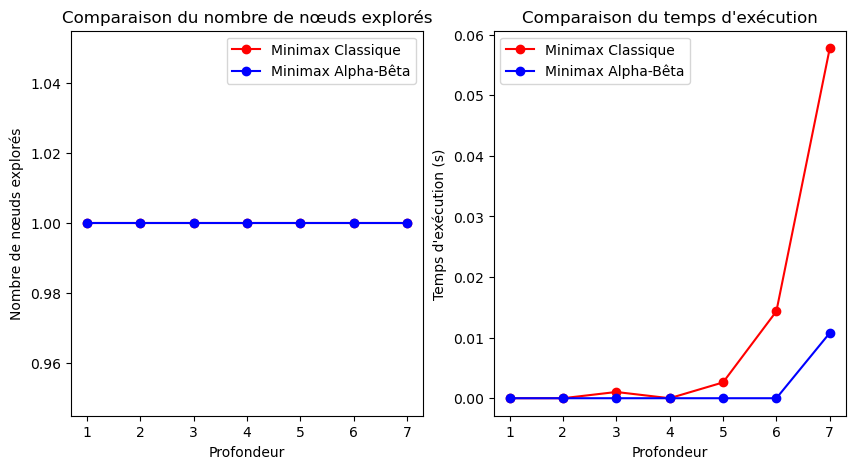

In [93]:
class Noeud:
    def __init__(self, etat, profondeur=0):
        self.etat = etat  # État du jeu (ex: bitboard ou grille)
        self.profondeur = profondeur
        self.nbr_noeuds_explores = 0  # Compteur de nœuds

    def evaluation(self):
        """ Fonction d'évaluation simplifiée """
        return 0  # À remplacer par une vraie fonction d'évaluation

    def get_successors(self, joueur):
        """ Génère les états suivants pour un joueur donné """
        return [Noeud(self.etat, self.profondeur + 1) for _ in range(5)]  # Simulation de 5 successeurs

    def minimax(self, profondeur, maximiser):
        """ Version classique de Minimax (sans élagage) """
        self.nbr_noeuds_explores += 1  # Compter les nœuds explorés

        if profondeur == 0:
            return self.evaluation()

        if maximiser:
            max_eval = float('-inf')
            for succ in self.get_successors('X'):
                eval = succ.minimax(profondeur - 1, False)
                max_eval = max(max_eval, eval)
            return max_eval
        else:
            min_eval = float('inf')
            for succ in self.get_successors('O'):
                eval = succ.minimax(profondeur - 1, True)
                min_eval = min(min_eval, eval)
            return min_eval

    def minimax_alpha_beta(self, profondeur, alpha, beta, maximiser):
        """ Version optimisée avec élagage alpha-bêta """
        self.nbr_noeuds_explores += 1  # Compter les nœuds explorés

        if profondeur == 0:
            return self.evaluation()

        if maximiser:
            max_eval = float('-inf')
            for succ in self.get_successors('X'):
                eval = succ.minimax_alpha_beta(profondeur - 1, alpha, beta, False)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:  # Coupure alpha-bêta
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for succ in self.get_successors('O'):
                eval = succ.minimax_alpha_beta(profondeur - 1, alpha, beta, True)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:  # Coupure alpha-bêta
                    break
            return min_eval

import time
import matplotlib.pyplot as plt

profondeurs = range(1, 8)
resultats_minimax = []
resultats_alpha_beta = []

for p in profondeurs:
    # Test Minimax classique
    noeud_minimax = Noeud(etat=None)
    start = time.time()
    noeud_minimax.minimax(p, True)
    end = time.time()
    resultats_minimax.append((noeud_minimax.nbr_noeuds_explores, end - start))

    # Test Minimax avec Alpha-Bêta
    noeud_alpha_beta = Noeud(etat=None)
    start = time.time()
    noeud_alpha_beta.minimax_alpha_beta(p, float('-inf'), float('inf'), True)
    end = time.time()
    resultats_alpha_beta.append((noeud_alpha_beta.nbr_noeuds_explores, end - start))

# Affichage des résultats
noeuds_minimax, temps_minimax = zip(*resultats_minimax)
noeuds_alpha_beta, temps_alpha_beta = zip(*resultats_alpha_beta)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(profondeurs, noeuds_minimax, 'r-o', label="Minimax Classique")
plt.plot(profondeurs, noeuds_alpha_beta, 'b-o', label="Minimax Alpha-Bêta")
plt.xlabel("Profondeur")
plt.ylabel("Nombre de nœuds explorés")
plt.title("Comparaison du nombre de nœuds explorés")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(profondeurs, temps_minimax, 'r-o', label="Minimax Classique")
plt.plot(profondeurs, temps_alpha_beta, 'b-o', label="Minimax Alpha-Bêta")
plt.xlabel("Profondeur")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison du temps d'exécution")
plt.legend()

plt.show()

